In [1]:
#HERE STARTS THE LAB CUSTOMER ANALYSIS ROUND 2----------------------------------------------------------------------------------

In [2]:
#0
import pandas as pd
import numpy as np

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', index_col=[0])

In [3]:
#2.Standardize header names(white spaces and lower case).
column_names = df.columns
cols = []
for colname in df.columns:
    cols.append(colname.lower().replace(' ', '_'))

df.columns = cols

In [4]:
#5.Check and deal with NaN values.
#df = df.drop(['vehicle_type'], axis=1)
df['state'] = df['state'].fillna('California')
df['response'] = df['response'].fillna('No')
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].median())
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(df['number_of_open_complaints'].median())
df['vehicle_class'] = df['vehicle_class'].fillna(df['vehicle_class'].mode()[0])
df['vehicle_size'] = df['vehicle_size'].fillna(df['vehicle_size'].mode()[0])
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

In [5]:
#7.BONUS: Put all the previously mentioned data transformations into a function.

In [6]:
def df_cleaner(df):
    df1 = df.copy()
    column_names = df1.columns
    cols = []
    for colname in df1.columns:
        cols.append(colname.lower())
    df1.columns = cols
    df1.columns = df1.columns.str.replace(' ', '_')
    df1 = df1.drop(['vehicle_type'], axis=1)
    df1['state'] = df1['state'].fillna('California')
    df1['response'] = df1['response'].fillna('No')
    df1['months_since_last_claim'] = df1['months_since_last_claim'].fillna(df1['months_since_last_claim'].median())
    df1['number_of_open_complaints'] = df1['number_of_open_complaints'].fillna(df1['number_of_open_complaints'].median())
    df1['vehicle_class'] = df1['vehicle_class'].fillna(df1['vehicle_class'].mode()[0])
    df1['vehicle_size'] = df1['vehicle_size'].fillna(df1['vehicle_size'].mode()[0])
    df1['effective_to_date'] = pd.to_datetime(df1['effective_to_date'], errors='coerce')
    return df1

In [7]:
#HERE STARTS THE LAB CUSTOMER ANALYSIS ROUND 3----------------------------------------------------------------------------------

In [8]:
display(df)
#1.Show DataFrame info.
df.info()
df.isna().sum()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
#2.Describe DataFrame.
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


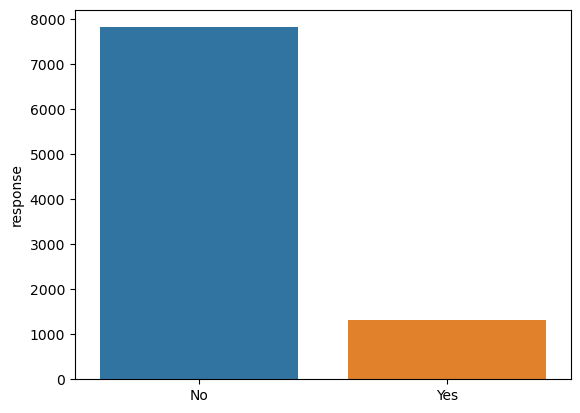

In [10]:
#3.Show a plot of the total number of responses.
sns.barplot(x=df.response.value_counts().index, y=df.response.value_counts())
plt.show()

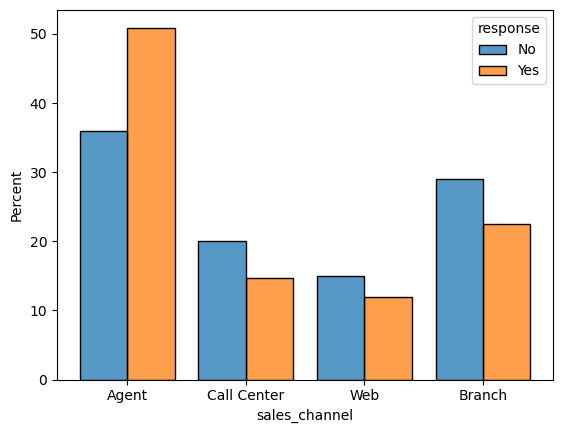

In [11]:
#4.Show a plot of the response rate by the sales channel.
sns.histplot(x = df['sales_channel'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

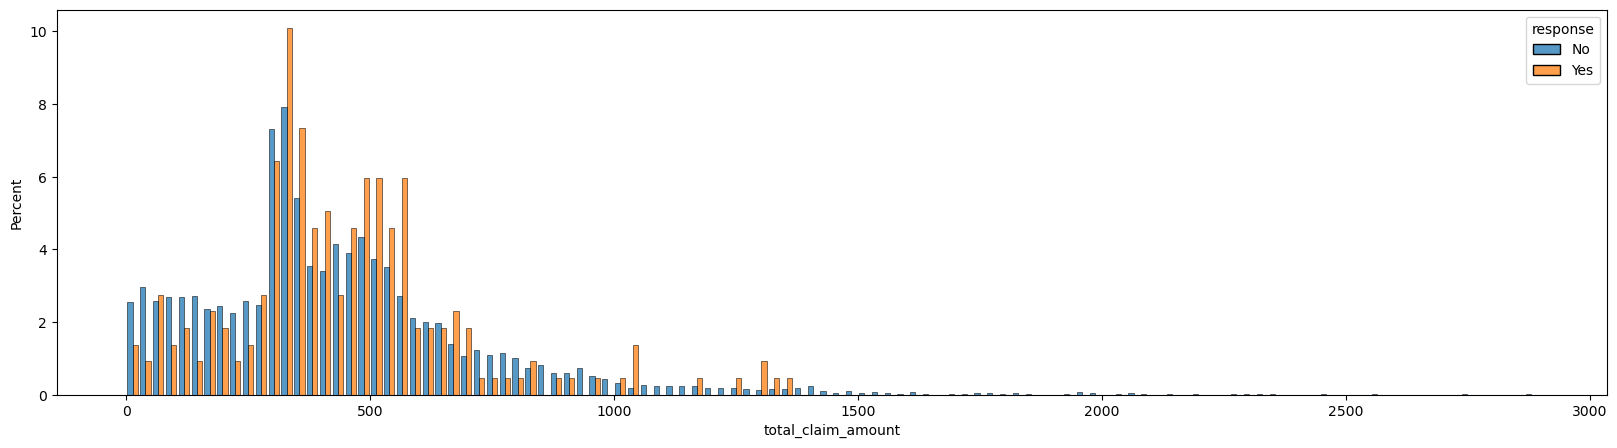

In [12]:
#5.Show a plot of the response rate by the total claim amount.
fig, ax = plt.subplots(figsize=(20,5))
sns.histplot(x = df['total_claim_amount'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

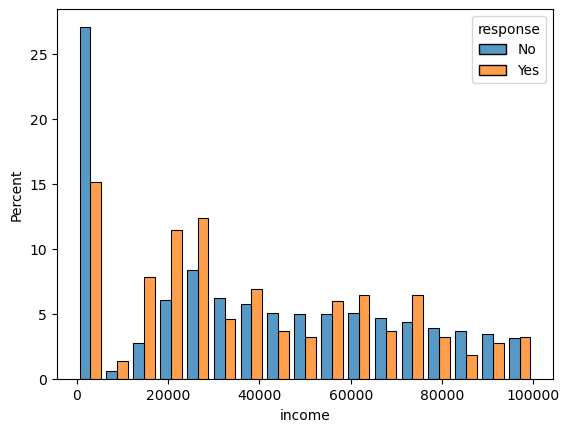

In [13]:
#6.Show a plot of the response rate by income.

sns.histplot(x = df['income'], hue=df['response'], multiple="dodge", shrink = 0.8, stat = 'percent', common_norm=False)
plt.show()

In [14]:
#HERE STARTS THE LAB CUSTOMER ANALYSIS ROUND 4----------------------------------------------------------------------------------

In [15]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns
#in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical
#data types respectively)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

In [17]:
numerical = df._get_numeric_data() 
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [18]:
categoricals = df.select_dtypes('object')
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


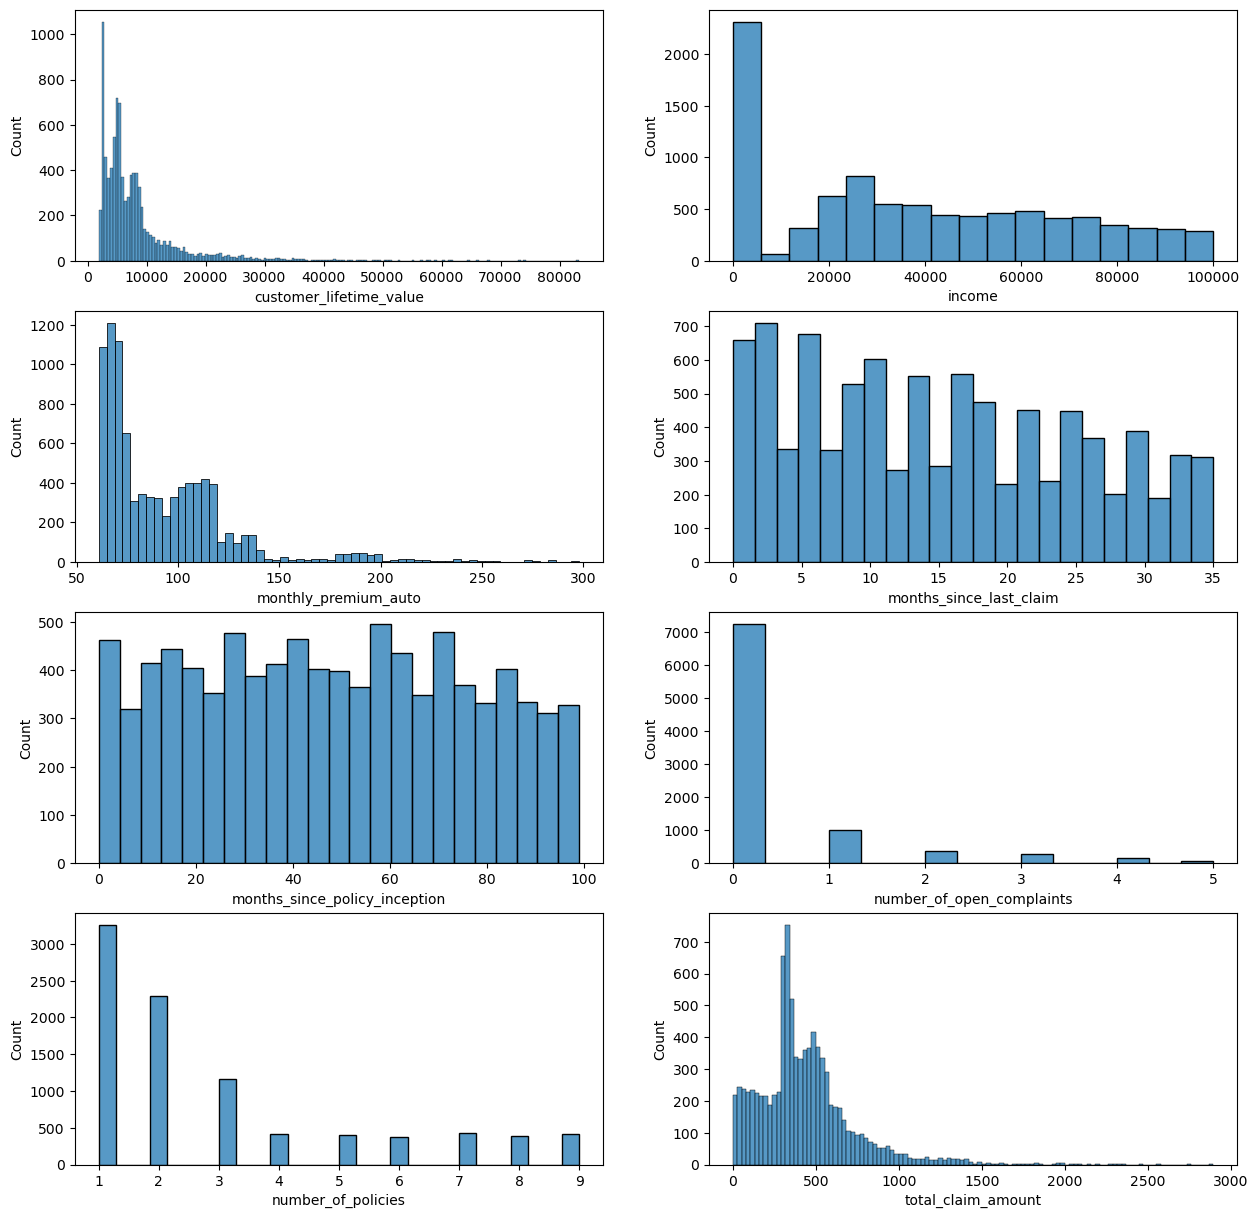

In [19]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
fig, ax = plt.subplots(4,2, figsize=(15,15))
sns.histplot(x='customer_lifetime_value', data=df, ax = ax[0][0]) #bins=50
sns.histplot(x='income', data=df, ax = ax[0][1])
sns.histplot(x='monthly_premium_auto', data=df, ax = ax[1][0])
sns.histplot(x='months_since_last_claim', data=df, ax = ax[1][1])
sns.histplot(x='months_since_policy_inception', data=df, ax = ax[2][0])
sns.histplot(x='number_of_open_complaints', data=df, ax = ax[2][1])
sns.histplot(x='number_of_policies', data=df, ax = ax[3][0])
sns.histplot(x='total_claim_amount', data=df, ax = ax[3][1])
plt.show()

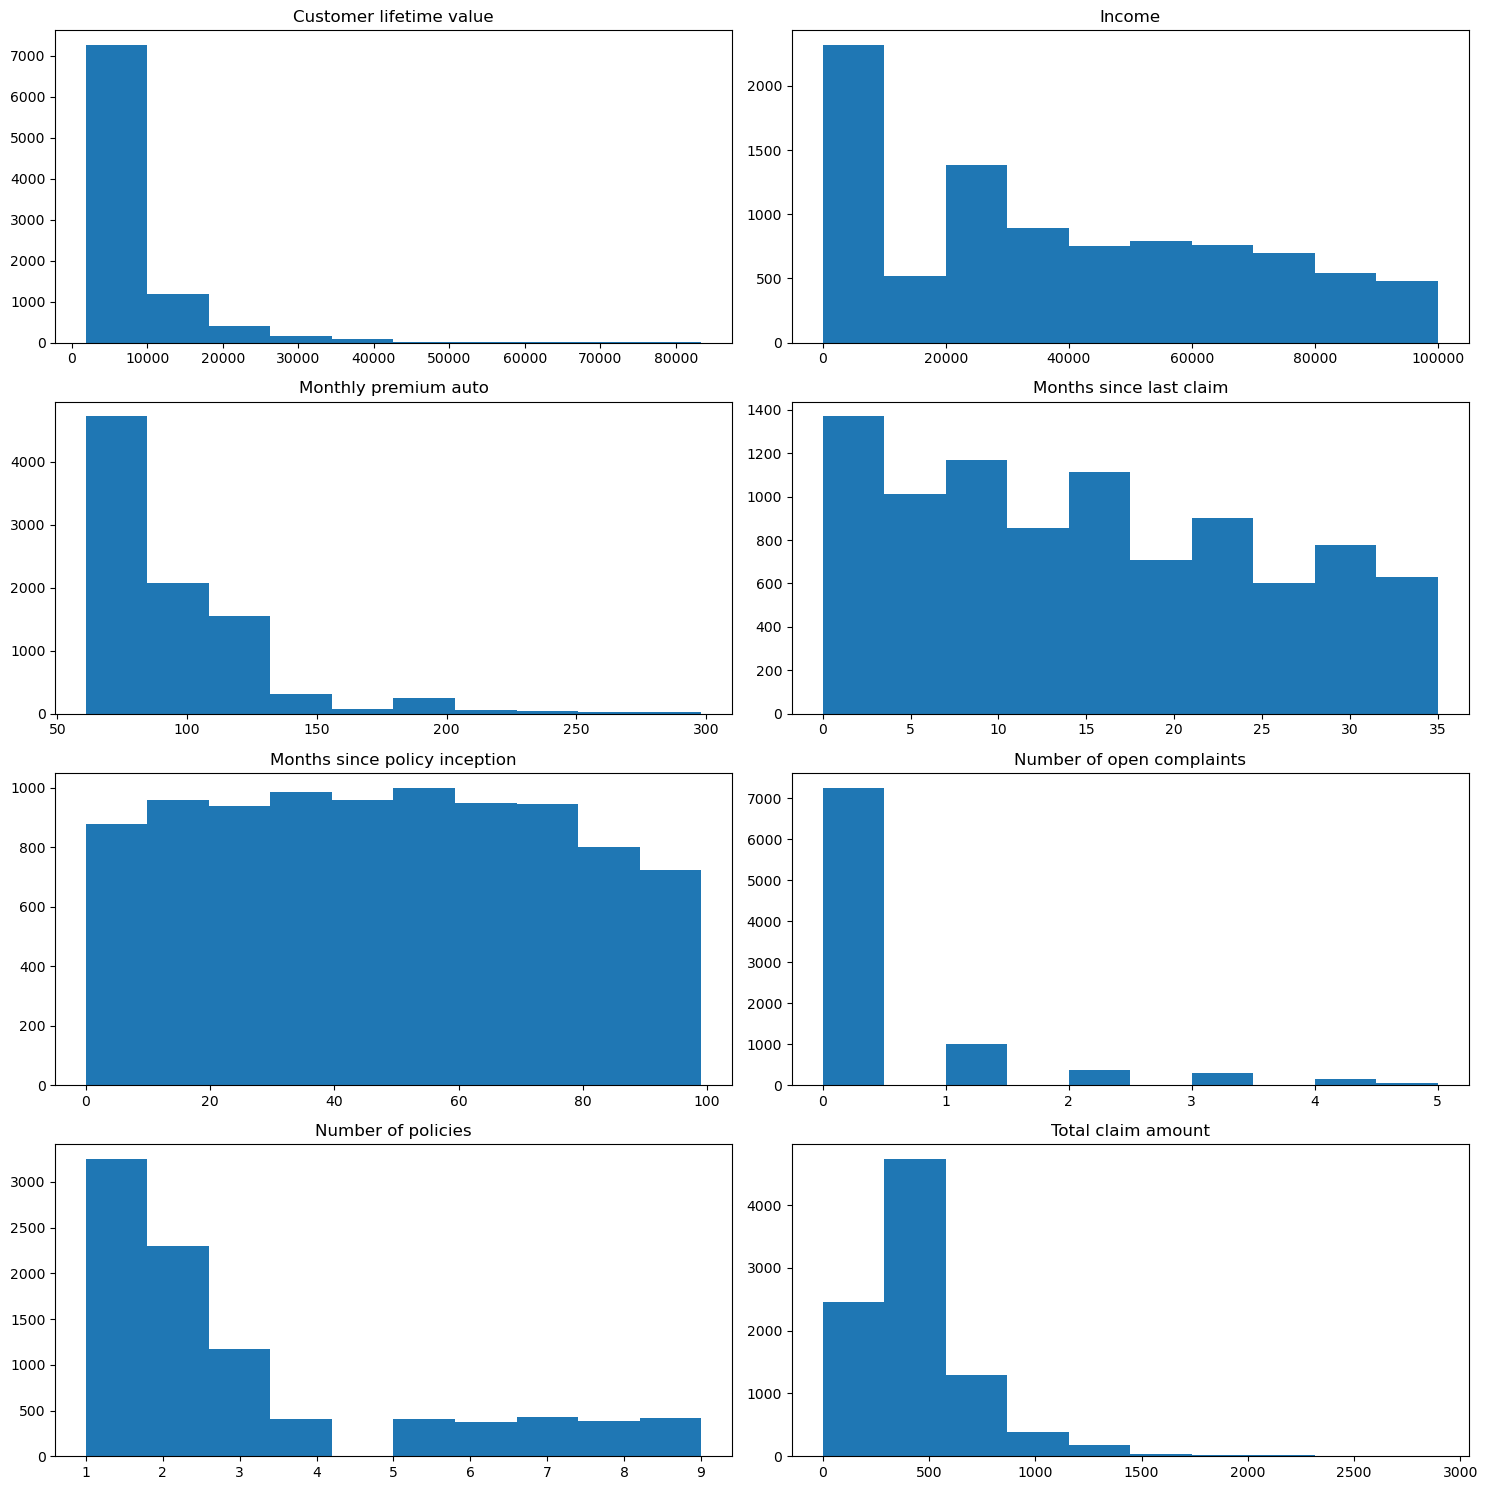

In [20]:
#Use Matplotlib to construct histograms
fig, ax = plt.subplots(4,2, figsize=(15,15))
ax[0,0].hist('customer_lifetime_value', data=df)
ax[0,0].set_title('Customer lifetime value')
ax[0,1].hist('income', data=df)
ax[0,1].set_title('Income')
ax[1,0].hist('monthly_premium_auto', data=df)
ax[1,0].set_title('Monthly premium auto')
ax[1,1].hist('months_since_last_claim', data=df)
ax[1,1].set_title('Months since last claim')
ax[2,0].hist('months_since_policy_inception', data=df)
ax[2,0].set_title('Months since policy inception')
ax[2,1].hist('number_of_open_complaints', data=df)
ax[2,1].set_title('Number of open complaints')
ax[3,0].hist('number_of_policies', data=df)
ax[3,0].set_title('Number of policies')
ax[3,1].hist('total_claim_amount', data=df)
ax[3,1].set_title('Total claim amount')

plt.tight_layout()
plt.show()

In [21]:
#Do the distributions for different numerical variables look like a normal distribution?
#Answer: None of them shows a normal distibution, mostly left skewed or continuous uniform distribution among others.

In [22]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column
#total_claim_amount later as the target variable.

In [23]:
df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [24]:
#I have picked the columns with bigger correlation twith total claim amount (which is the target varible to predict)
df[['customer_lifetime_value','income', 'monthly_premium_auto', 'total_claim_amount']].corr().T

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.226451
income,0.024366,1.000000,-0.016665,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.632017
total_claim_amount,0.226451,-0.355254,0.632017,1.000000


In [25]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high
#correlation, then do not drop any features

In [26]:
corr_matrix_filt = df[['customer_lifetime_value','income', 'monthly_premium_auto', 'total_claim_amount']].corr()
corr_matrix_filt

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.226451
income,0.024366,1.000000,-0.016665,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.632017
total_claim_amount,0.226451,-0.355254,0.632017,1.000000


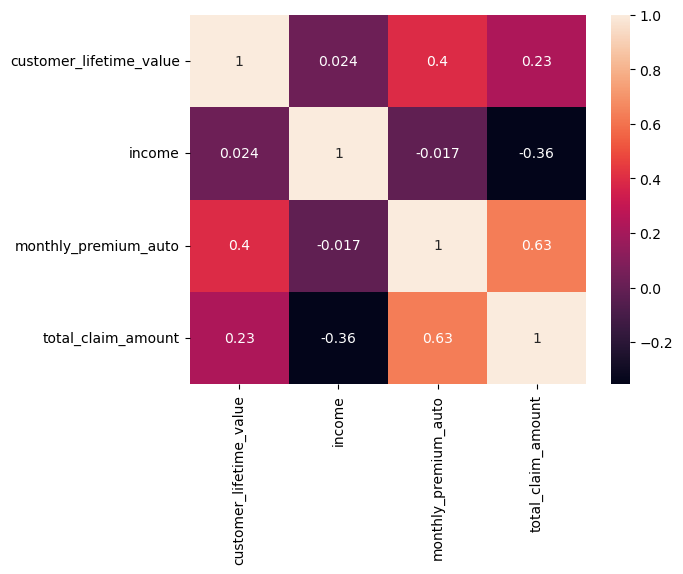

In [27]:
sns.heatmap(corr_matrix_filt, annot=True)
plt.show()

In [28]:
#we will not have to drop any variable because there are not 2 variables with a correlation bigger than 0.9

In [29]:
#HERE STARTS THE LAB CUSTOMER ANALYSIS ROUND 5----------------------------------------------------------------------------------

In [30]:
#X-y split (we want to predict total_claim_amount).
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
reduced_df = df[['customer_lifetime_value','income', 'monthly_premium_auto', 'total_claim_amount']]
y = reduced_df['total_claim_amount']
x = reduced_df.drop(['total_claim_amount'], axis=1)
lm = LinearRegression().fit (x,y)

In [31]:
print(lm.score(x,y))

0.5185218926553223


In [32]:
print(lm.intercept_)
print(lm.coef_)

65.59567765365705
[-6.68541389e-04 -3.29254837e-03  5.34045575e+00]


In [33]:
#Another alternative is trying to predict total claim amount using just the varible with the biggest correlation.
x2 = reduced_df[['monthly_premium_auto']]
lm2 = LinearRegression().fit (x2,y)

In [34]:
print(lm2.score(x2,y)) #however, the performance of the model lm2 (0.4) is worse than lm (0.52), therefore we will use lm.
print(lm2.intercept_)
print(lm2.coef_)

0.3994450617021763
-63.32929837275776
[5.33599955]


In [35]:
#Normalize (numerical).

In [36]:
#Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x)
x_normalized = transformer.transform(x)
display(x_normalized)
X_norm_df = pd.DataFrame(x_normalized, columns=x.columns) 

array([[0.01062925, 0.56284694, 0.03375527],
       [0.06240565, 0.        , 0.13924051],
       [0.13495982, 0.48776267, 0.19831224],
       ...,
       [0.07695057, 0.        , 0.10126582],
       [0.06909758, 0.2194517 , 0.14767932],
       [0.00876645, 0.        , 0.06751055]])

In [37]:
#I have decided to use MinMax scaler as the way of normalize the independent variable

In [38]:
#HERE STARTS THE LAB CUSTOMER ANALYSIS ROUND 6(CORRECTED)-----------------------------------------------------------------------

In [39]:
#Train-test split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_norm_df, y, test_size=0.2, random_state=42)

In [40]:
#Apply linear regression.
lm3 = LinearRegression().fit(x_train,y_train)
y_pred_train = lm3.predict(x_train)
y_pred_test = lm3.predict(x_test)

In [41]:
#Model validation with R2:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_test)

0.49427417837326715

In [42]:
#Model validation with MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_test)

40210.786421068915

In [43]:
#Model validation with RMSE
np.sqrt(mean_squared_error(y_test,y_pred_test))

200.5262736428045

In [44]:
#Model validation with MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_test)

145.30815783274053

In [45]:
#HERE STARTS THE LAB CUSTOMER ANALYSIS ROUND 7----------------------------------------------------------------------------------

In [46]:
#Bonus: build a function, from round 2 and round 7, to clean and process the data.
def df_cleaner_lm(df1):
    df2 = df1.copy()
    column_names = df2.columns
    cols = []
    for colname in df2.columns:
        cols.append(colname.lower().replace(' ', '_'))
    df2.columns = cols
    #df1 = df1.drop(['vehicle_type'], axis=1)
    df2['state'] = df2['state'].fillna('California')
    df2['response'] = df2['response'].fillna('No')
    df2['months_since_last_claim'] = df2['months_since_last_claim'].fillna(df2['months_since_last_claim'].median())
    df2['number_of_open_complaints'] = df2['number_of_open_complaints'].fillna(df2['number_of_open_complaints'].median())
    df2['vehicle_class'] = df2['vehicle_class'].fillna(df2['vehicle_class'].mode()[0])
    df2['vehicle_size'] = df2['vehicle_size'].fillna(df2['vehicle_size'].mode()[0])
    df2['effective_to_date'] = pd.to_datetime(df2['effective_to_date'], errors='coerce')
    reduced_df2 = df2[['customer_lifetime_value','income', 'monthly_premium_auto', 'total_claim_amount']]
    y_1 = reduced_df2['total_claim_amount']
    x_1 = reduced_df2.drop(['total_claim_amount'], axis=1)
    lm_1 = LinearRegression().fit (x_1,y_1)
    transformer_1 = MinMaxScaler().fit(x_1)
    x_normalized_1 = transformer.transform(x_1)
    X_norm_df1 = pd.DataFrame(x_normalized_1, columns=x_1.columns)
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_norm_df1, y_1, test_size=0.2, random_state=42)
    lm3_1 = LinearRegression().fit(x_train_1,y_train_1)
    y_pred_train_1 = lm3_1.predict(x_train_1)
    y_pred_test_1 = lm3_1.predict(x_test_1)
    r2 = r2_score(y_test, y_pred_test)
    df2_trained = pd.DataFrame(x_train_1, columns=x_train_1.columns)
    return df2_trained, 'To predict total claim amount the model used gives back an R2 score of: ', r2

In [47]:
df_bonus = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', index_col=[0])
bonus = df_cleaner_lm(df_bonus)

In [48]:
print(bonus)
type(bonus)
#I don't know why it returns me a tuple when I have never change the DataFrame and I don't know how to solve it

(      customer_lifetime_value    income  monthly_premium_auto
5123                 0.035258  0.511537              0.000000
7738                 0.011416  0.000000              0.075949
214                  0.012464  0.811124              0.054852
8580                 0.039793  0.722777              0.012658
7857                 0.008748  0.547474              0.021097
...                       ...       ...                   ...
5734                 0.066763  0.879737              0.000000
5191                 0.044223  0.225243              0.050633
5390                 0.087130  0.000000              0.286920
860                  0.156427  0.000000              0.329114
7270                 0.017827  0.781068              0.097046

[7307 rows x 3 columns], 'To predict total claim amount the model used gives back an R2 score of: ', 0.49427417837326715)


tuple

In [49]:
#Try to improve the linear regression model
#We could try to improve the model applying another transformer before MinMax Scaler.

In [50]:
from sklearn.preprocessing import PowerTransformer
transformer_def1 = PowerTransformer().fit(x) 
x_pt = transformer.transform(x)
x_pt_df = pd.DataFrame(x_pt, columns=x.columns)
x_pt_df.head()

,customer_lifetime_value,income,monthly_premium_auto
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633


In [51]:
transformer_def2 = MinMaxScaler().fit(x_pt_df)
x_ptms = transformer.transform(x_pt_df)
x_ptms_df  = pd.DataFrame(x_ptms,  columns=x_pt_df.columns)
x_ptms_df.head()

,customer_lifetime_value,income,monthly_premium_auto
0,-0.023309,0.000006,-0.257242
1,-0.023308,0.000000,-0.256796
2,-0.023308,0.000005,-0.256547
3,-0.023308,0.000000,-0.256583
4,-0.023309,0.000004,-0.257170


In [52]:
x_train_def, x_test_def, y_train_def, y_test_def = train_test_split(x_ptms_df, y, test_size=0.2, random_state=42)

lm_def = LinearRegression().fit(x_train_def, y_train_def)
y_pred_train_def = lm_def.predict(x_train_def)
y_pred_test_def = lm_def.predict(x_test_def)

In [53]:
print(r2_score(y_test_def, y_pred_test_def))
print(mean_squared_error(y_test_def, y_pred_test_def))
print(np.sqrt(mean_squared_error(y_test_def, y_pred_test_def)))
print(mean_absolute_error(y_test_def, y_pred_test_def))

0.49427417837326937
40210.78642106874
200.52627364280409
145.30815783273982


In [54]:
r2_score(y_test,y_pred_test) < (r2_score(y_test_def, y_pred_test_def)) #I IMPROVE IT!! BUT HONESTLY VERY LITTLE

True

In [55]:
mean_squared_error(y_test,y_pred_test) > mean_squared_error(y_test_def, y_pred_test_def)

True

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred_test)) > np.sqrt(mean_squared_error(y_test_def, y_pred_test_def))

True

In [57]:
mean_absolute_error(y_test, y_pred_test) > mean_absolute_error(y_test_def, y_pred_test_def)

True